In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 낮 시간 데이터만 있는 태양광 발전량 데이터

df = pd.read_csv("../data/sun.csv")
df.head()

,일시,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),태양광 발전량(MWh),solar_altitude,_강원도,_경기도,_경상남도,_경상북도,_부산시,_울산시,_인천시,_전라남도,_전라북도,_제주도,_충청남도
0,2020-01-01 00:00:00+09:00,-8.2,0.0,0.3,0.0,77.0,0.24,-71.412722,0,0,0,0,0,0,0,0,1,0,0
1,2020-01-01 01:00:00+09:00,-8.6,0.0,0.0,0.0,79.0,0.50,-75.237641,0,0,0,0,0,0,0,0,1,0,0
2,2020-01-01 02:00:00+09:00,-7.9,284.8,0.7,0.0,78.0,0.37,-69.496024,0,0,0,0,0,0,0,0,1,0,0
3,2020-01-01 03:00:00+09:00,-7.8,215.2,1.4,0.0,80.0,0.05,-59.190126,0,0,0,0,0,0,0,0,1,0,0
4,2020-01-01 04:00:00+09:00,-6.7,209.7,1.4,0.0,78.0,0.02,-47.642389,0,0,0,0,0,0,0,0,1,0,0


In [3]:
df.columns

Index(['일시', '기온(°C)', '풍향(deg)', '풍속(m/s)', '강수량(mm)', '습도(%)',
       ' 태양광 발전량(MWh) ', 'solar_altitude', '_강원도', '_경기도', '_경상남도', '_경상북도',
       '_부산시', '_울산시', '_인천시', '_전라남도', '_전라북도', '_제주도', '_충청남도'],
      dtype='object')

In [4]:
df['일시'] = df['일시'].astype(str)


In [5]:
df['일시'] = df['일시'].str[:-6]

In [6]:
df['일시'] = pd.to_datetime(df['일시'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271785 entries, 0 to 271784
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   일시              271785 non-null  datetime64[ns]
 1   기온(°C)          270949 non-null  float64       
 2   풍향(deg)         271277 non-null  float64       
 3   풍속(m/s)         271318 non-null  float64       
 4   강수량(mm)         269290 non-null  float64       
 5   습도(%)           270968 non-null  float64       
 6    태양광 발전량(MWh)   271785 non-null  float64       
 7   solar_altitude  271785 non-null  float64       
 8   _강원도            271785 non-null  int64         
 9   _경기도            271785 non-null  int64         
 10  _경상남도           271785 non-null  int64         
 11  _경상북도           271785 non-null  int64         
 12  _부산시            271785 non-null  int64         
 13  _울산시            271785 non-null  int64         
 14  _인천시            271785 non-null  int

In [8]:
# '태양광 발전량'과 '일시' 열만 선택
solar_df = df[[' 태양광 발전량(MWh) ', '일시']]

solar_df.head()

,태양광 발전량(MWh),일시
0,0.24,2020-01-01 00:00:00
1,0.50,2020-01-01 01:00:00
2,0.37,2020-01-01 02:00:00
3,0.05,2020-01-01 03:00:00
4,0.02,2020-01-01 04:00:00


In [9]:
# '일시' 열을 날짜 형식으로 변환
# df['일시'] = pd.to_datetime(df['일시'], format='%Y-%m-%d %H:%M:%S%z')

# '일시'를 기준으로 그룹화하고 '태양광 발전량'을 합산
solar_df_day = df.groupby(df['일시'].dt.date)[' 태양광 발전량(MWh) '].sum().reset_index()

solar_df_day.tail()

,일시,태양광 발전량(MWh)
1029,2022-12-27,19653.72
1030,2022-12-28,16261.08
1031,2022-12-29,18718.16
1032,2022-12-30,16145.76
1033,2022-12-31,19230.01


## 시계열 분석

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima.model import ARIMA

In [11]:
# '일시' 열을 인덱스로 설정
solar_df_day.set_index('일시', inplace=True)

ts = solar_df_day
ts.head()

,태양광 발전량(MWh)
일시,
2020-01-01,7213.88
2020-01-02,6491.14
2020-01-03,9080.82
2020-01-04,9413.40
2020-01-05,10165.81


In [12]:
ts.tail()

,태양광 발전량(MWh)
일시,
2022-12-27,19653.72
2022-12-28,16261.08
2022-12-29,18718.16
2022-12-30,16145.76
2022-12-31,19230.01


In [13]:
# 결측치 확인

ts.isnull().sum()

 태양광 발전량(MWh)     0
dtype: int64

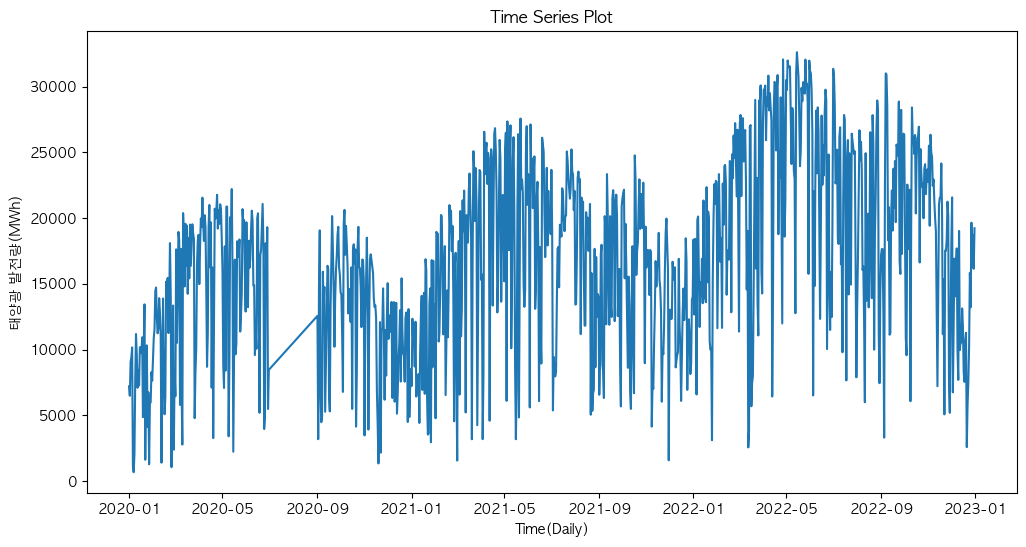

In [14]:
# 시계열 데이터 시각화

plt.figure(figsize=(12, 6))
plt.plot(ts)
plt.title('Time Series Plot')
plt.xlabel('Time(Daily)')
plt.ylabel('태양광 발전량(MWh)')
plt.show()

In [15]:
# plt 확장

from pylab import rcParams
rcParams['figure.figsize']=15,10

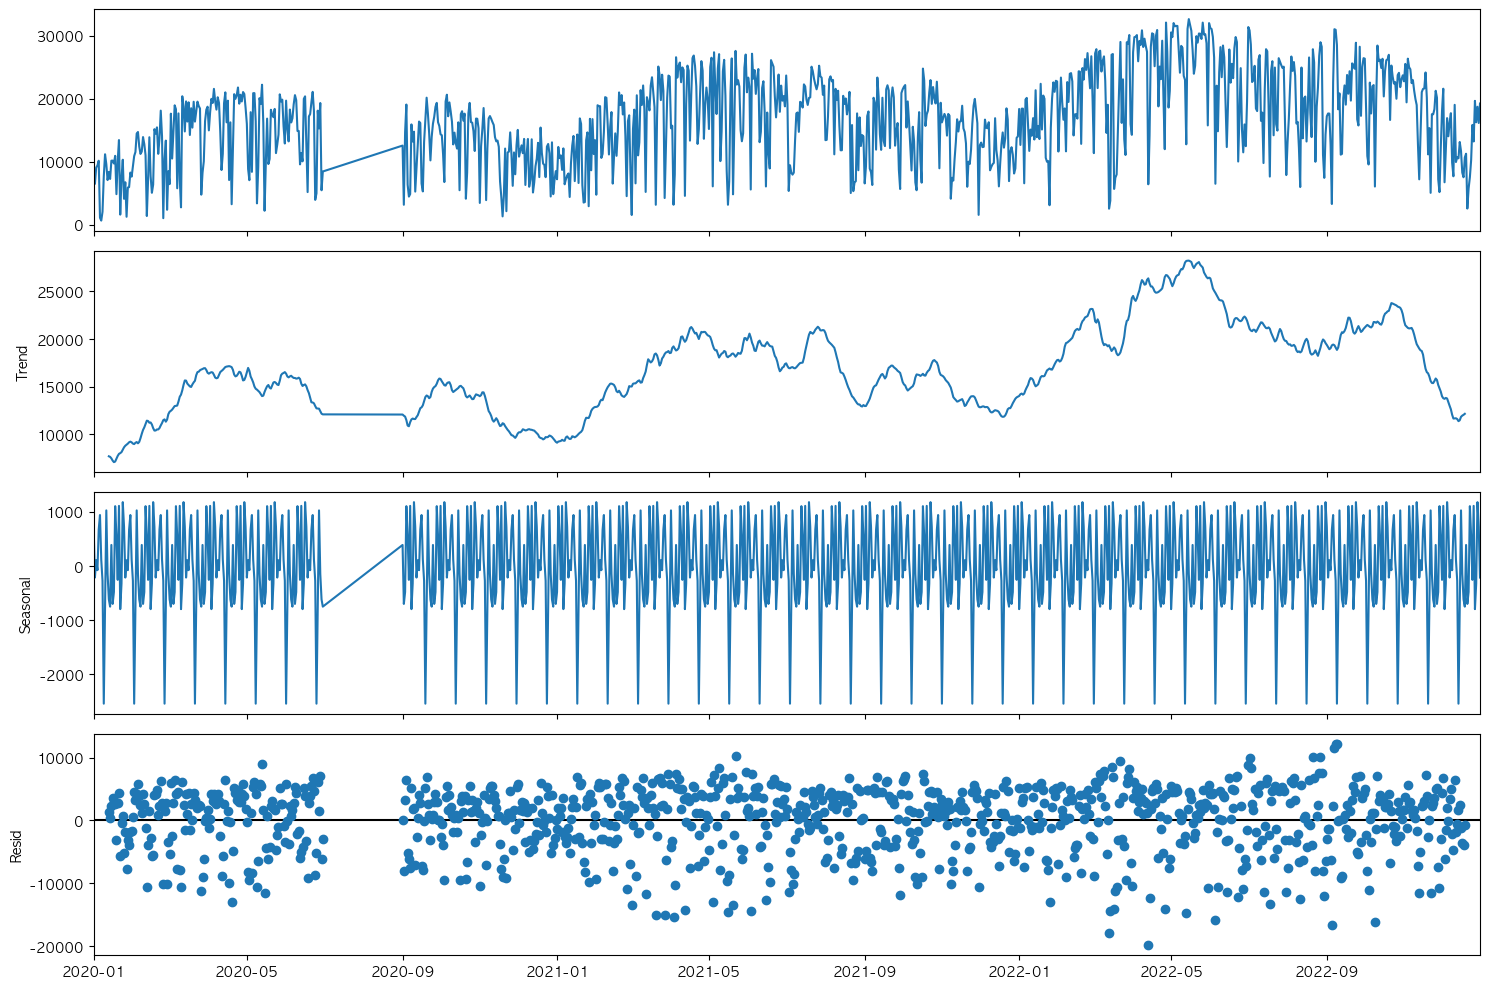

In [16]:
# 시계열 분해

result = seasonal_decompose(ts, model='additive', period=24)
result.plot()
plt.show()

## 정상성 검정

In [17]:
# 1. KPSS 검정

kpss_test_result = kpss(ts)

print(f'KPSS Statistic: {kpss_test_result[0]}')
print(f'p-value: {kpss_test_result[1]}')
print(f'Lags Used: {kpss_test_result[2]}')
print(f'Critical Values: {kpss_test_result[3]}')

print(f'검증결과: {"비정상(non-stationary)" if kpss_test_result[1] <= 0.05 else "정상(stationary)"} 시계열 데이터입니다.')

KPSS Statistic: 2.2632948975972504
p-value: 0.01
Lags Used: 17
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
검증결과: 비정상(non-stationary) 시계열 데이터입니다.


/var/folders/pl/c1z33rhx0tz096sc8p4_flzw0000gn/T/ipykernel_18151/2197487823.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test_result = kpss(ts)


In [18]:
# 2. ADF 검정

adf_test_result = adfuller(ts, autolag='AIC')

print(f'ADF Statistic: {adf_test_result[0]}')
print(f'p-value: {adf_test_result[1]}')
print(f'Critical Values: {adf_test_result[4]}')
print(f'Best number of lags (AIC): {adf_test_result[3]}')

# 검증 결과 출력
print(f'검증결과: {"정상(stationary)" if adf_test_result[1] <= 0.01 else "비정상(non-stationary)"} 시계열 데이터입니다.')

ADF Statistic: -3.659369369268652
p-value: 0.004722346360779797
Critical Values: {'1%': -3.4367709764382024, '5%': -2.8643749513463637, '10%': -2.568279452717228}
Best number of lags (AIC): 1021
검증결과: 정상(stationary) 시계열 데이터입니다.


### 정상성 확보를 위한 차분

In [19]:
# 1차 차분

ts_diff = ts.diff().dropna()
# 차분을 진행할 때는 두 값을 빼주게 됨. 그렇기에 차분을 진행할 때마다 데이터의 길이가 짧이지면서, 짧아진 부분에 공백이 생김.
# 이 공백을 지워주지 않으면 ADF검정 과정에서 오류가 발생할 수 있다고 함.

In [20]:
# 1. 1차 차분 후 KPSS 검정

kpss_test_result_diff = kpss(ts_diff)

print(f'KPSS Statistic after differencing: {kpss_test_result_diff[0]}')
print(f'p-value after differencing: {kpss_test_result_diff[1]}')
print(f'Lags Used after differencing: {kpss_test_result_diff[2]}')
print(f'Critical Values after differencing: {kpss_test_result_diff[3]}')

print(f'검증결과: {"비정상(non-stationary)" if kpss_test_result_diff[1] <= 0.05 else "정상(stationary)"} 시계열 데이터입니다.')

KPSS Statistic after differencing: 0.07086770191039689
p-value after differencing: 0.1
Lags Used after differencing: 123
Critical Values after differencing: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
검증결과: 정상(stationary) 시계열 데이터입니다.


/var/folders/pl/c1z33rhx0tz096sc8p4_flzw0000gn/T/ipykernel_18151/4077214608.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test_result_diff = kpss(ts_diff)


In [21]:
# 2. 1차 차분 후 ADF 검정

adf_test_result_diff = adfuller(ts_diff, autolag='AIC')

print(f'ADF Statistic: {adf_test_result_diff[0]}')
print(f'p-value: {adf_test_result_diff[1]}')
print(f'Critical Values: {adf_test_result_diff[4]}')
print(f'Best number of lags (AIC): {adf_test_result_diff[3]}')

print(f'검증결과: {"정상(stationary)" if adf_test_result_diff[1] <= 0.05 else "비정상(non-stationary)"} 시계열 데이터입니다.')

ADF Statistic: -15.714542205094503
p-value: 1.346828176793479e-28
Critical Values: {'1%': -3.4367709764382024, '5%': -2.8643749513463637, '10%': -2.568279452717228}
Best number of lags (AIC): 1021
검증결과: 정상(stationary) 시계열 데이터입니다.


## AutoRegressive Integrated Moving Average(ARIMA) 모델

In [22]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [23]:
ts.index = pd.to_datetime(ts.index)

# 데이터를 학습 데이터와 검증 데이터로 나누기
train_size = int(len(ts) * 0.8)
train, validation = ts[0:train_size], ts[train_size:]

# 가능한 매개변수 조합 생성
p_values = range(0, 2)
d_values = range(1, 2)  # 1차 차분 이상해야 정상성 확보
q_values = range(0, 2)

# 최적 매개변수 초기화
best_aic, best_cfg = float("inf"), None

# Grid Search를 통한 최적 매개변수 찾기
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                # ARIMA 모델 생성 및 훈련
                model = ARIMA(train, order=order)
                fit_model = model.fit()

                # AIC 계산
                aic = fit_model.aic

                # 현재 조합의 성능이 더 좋으면 갱신
                if aic < best_aic:
                    best_aic, best_cfg = aic, order

            except Exception as e:
                print(f"An exception occurred during model training: {str(e)}")
                continue

# 최적 매개변수 출력
print(f"Best ARIMA Order (by AIC): {best_cfg}")
print(f"Best AIC: {best_aic}")

# 최적 매개변수로 ARIMA 모델 훈련 및 예측
best_model = ARIMA(ts, order=best_cfg)
best_fit_model = best_model.fit()

# 예측
predictions = best_fit_model.predict(start=len(train), end=len(ts) - 1, dynamic=False)

# 예측 결과와 실제 데이터 비교
# MSE, RMSE 계산
mse = mean_squared_error(validation, predictions)
rmse = np.sqrt(mse)

print(f'Mean Squared Error on Validation Data: {mse}')
print(f'Root Mean Squared Error on Validation Data: {rmse}')

# MAPE 계산
mape = mean_absolute_percentage_error(validation, predictions)

print(f'Mean Absolute Percentage Error on Validation Data: {mape:.4f}')

/Users/choiseoyeo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/choiseoyeo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/choiseoyeo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/choiseoyeo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

Best ARIMA Order (by AIC): (1, 1, 1)
Best AIC: 16527.18767516721
Mean Squared Error on Validation Data: 31893916.24652529
Root Mean Squared Error on Validation Data: 5647.46989779718
Mean Absolute Percentage Error on Validation Data: 0.3493
